In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum() 
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [5]:
# Ensure necessary columns: 'Size', 'Qty', 'Category', 'Amount'
relevant_columns = ['Size', 'Qty', 'Category', 'Amount']
df = df.dropna(subset=relevant_columns)
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

print(f"Dataset after cleaning: {df.shape[0]} rows")

Dataset after cleaning: 121176 rows


In [6]:
# Step 3: Analyze Inventory Patterns
# 3.1 Total Quantity by Size
size_qty = df.groupby('Size')['Qty'].sum().sort_values(ascending=False)

# 3.2 Total Quantity by Product Category
category_qty = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# 3.3 Identify Overstocked Products (High Qty with Low Sales)
df['Sales_per_Qty'] = df['Amount'] / df['Qty']
overstocked = df[df['Sales_per_Qty'] < df['Sales_per_Qty'].quantile(0.25)]

# 3.4 Identify Out-of-Stock Products (Low Qty)
out_of_stock = df[df['Qty'] < df['Qty'].quantile(0.25)]

print("\nTop Sizes by Quantity:")
print(size_qty.head(10))

print("\nTop Categories by Quantity:")
print(category_qty.head(10))

print("\nOverstocked Products (Low Sales per Qty):")
print(overstocked[['Category', 'Size', 'Qty', 'Sales_per_Qty']].head(10))

print("\nOut-of-Stock Products (Low Qty):")
print(out_of_stock[['Category', 'Size', 'Qty']].head(10))


Top Sizes by Quantity:
Size
M       20118
L       19678
XL      18614
XXL     16220
S       15023
3XL     13342
XS       9836
Free     2051
6XL       687
5XL       512
Name: Qty, dtype: int64

Top Categories by Quantity:
Category
T-shirt     45228
Shirt       44969
Blazzer     13939
Trousers     9894
Perfume      1051
Wallet        844
Socks         398
Shoes         153
Watch           3
Name: Qty, dtype: int64

Overstocked Products (Low Sales per Qty):
   Category Size  Qty  Sales_per_Qty
1     Shirt  3XL    1          406.0
2     Shirt   XL    1          329.0
7     Shirt    S    1          399.0
9     Shirt  XXL    1          363.0
11    Shirt   XS    1          364.0
12    Shirt   XS    1          399.0
16    Shirt  XXL    1          329.0
17    Shirt   XL    1          399.0
22    Shirt    L    1          376.0
26    Shirt  3XL    1          299.0

Out-of-Stock Products (Low Qty):
     Category Size  Qty
0     T-shirt    S    0
3     Blazzer    L    0
23    T-shirt    M    0
83 

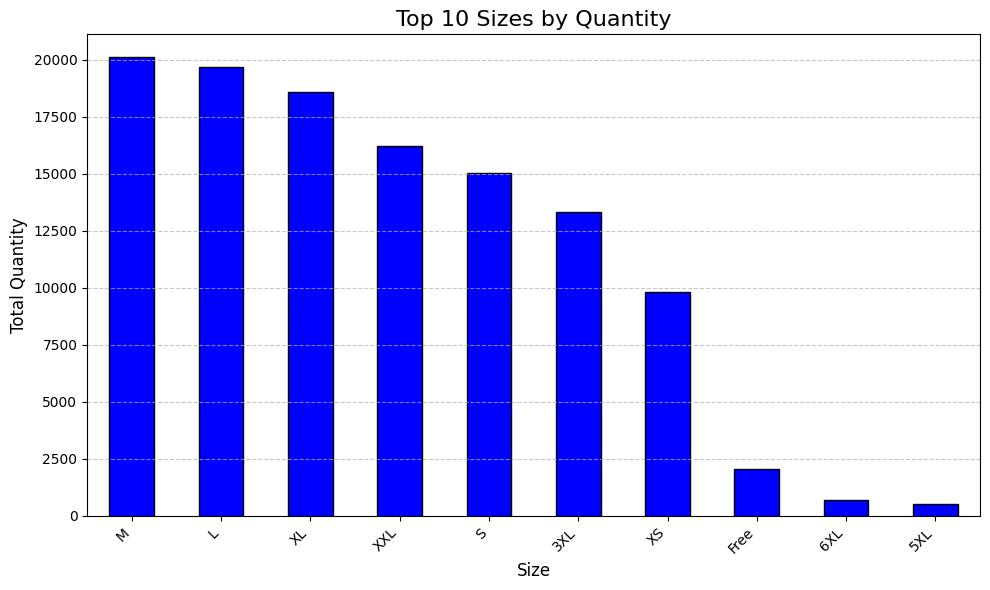

In [8]:
#Bar Graph: Quantity by Size
plt.figure(figsize=(10, 6))
size_qty.head(10).plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 Sizes by Quantity", fontsize=16)
plt.xlabel("Size", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

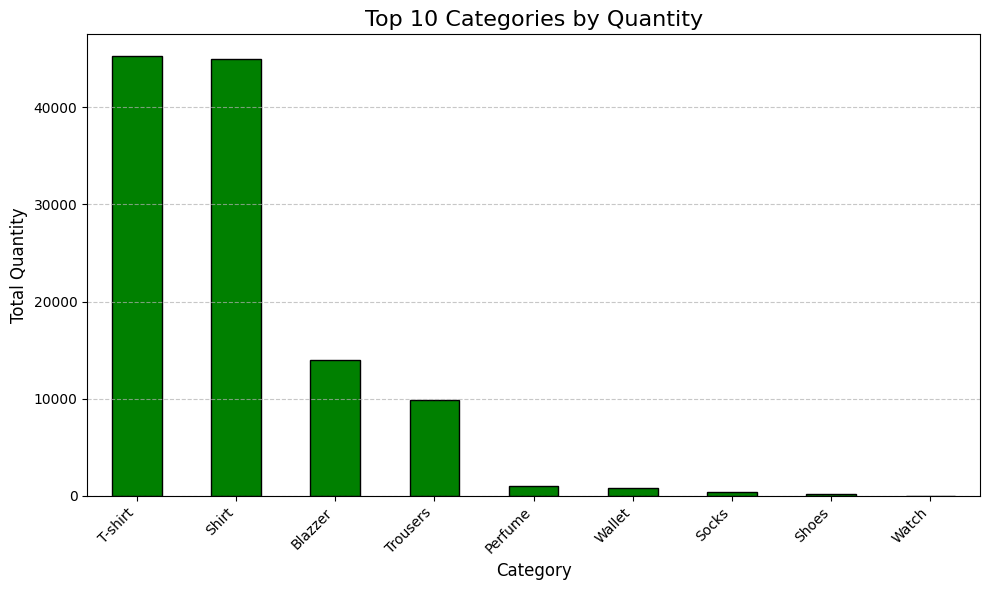

In [9]:
#Bar Graph: Quantity by Category
plt.figure(figsize=(10, 6))
category_qty.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title("Top 10 Categories by Quantity", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

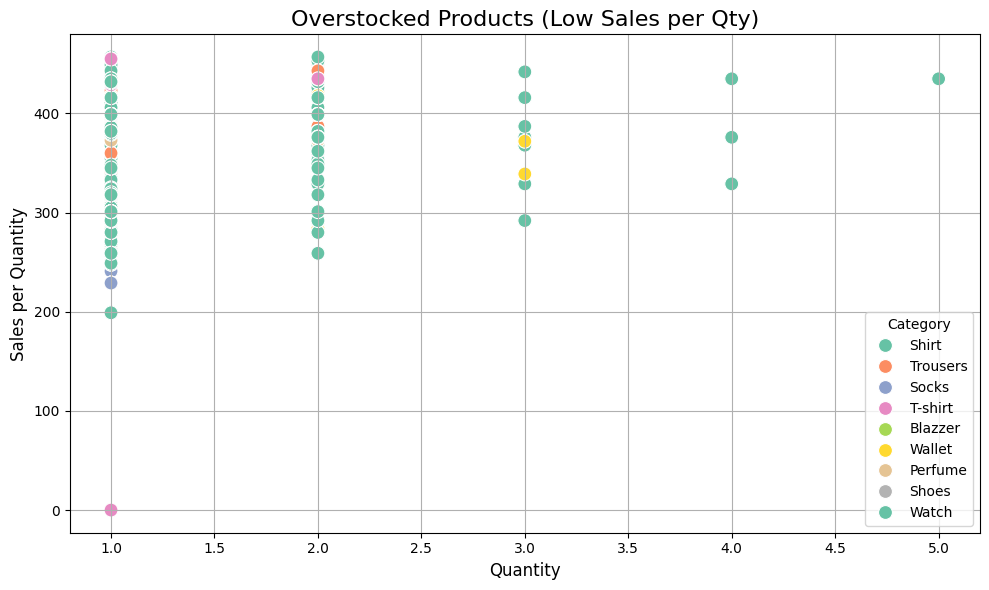

In [10]:
# Scatter Plot: Overstocked Products (Qty vs Sales per Qty)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=overstocked, x='Qty', y='Sales_per_Qty', hue='Category', palette='Set2', s=100)
plt.title("Overstocked Products (Low Sales per Qty)", fontsize=16)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Sales per Quantity", fontsize=12)
plt.grid(True)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14380\2731698097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Qty', palette='Set3')


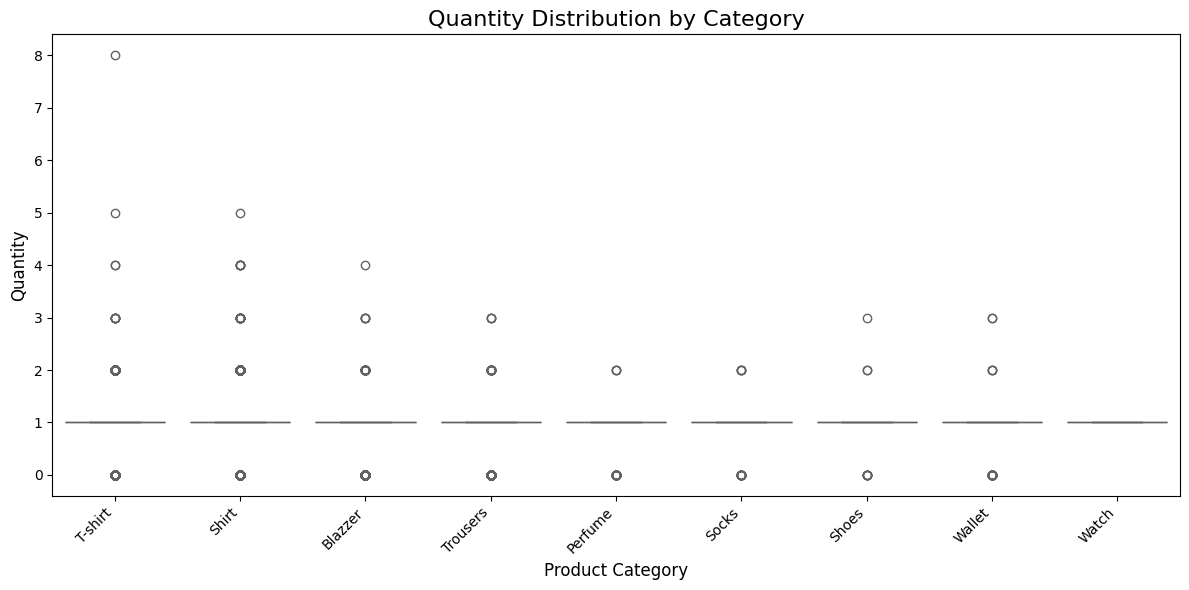

In [11]:
# Box Plot: Quantity Distribution by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Qty', palette='Set3')
plt.title("Quantity Distribution by Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()